In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)
print(np.__version__)
print(matplotlib.__version__)

1.4.1
1.13.3
2.0.2


In [5]:
mnist = input_data.read_data_sets("mnist_data/")

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [6]:
training_digits, training_labels = mnist.train.next_batch(2000)

test_digits, test_labels = mnist.test.next_batch(5)

In [7]:
def display_digit(digit):
    plt.imshow(digit.reshape(28, 28), cmap="Greys", interpolation='nearest')

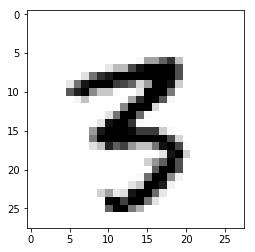

In [8]:
display_digit(training_digits[0])

In [9]:
from tensorflow.contrib.learn.python.learn.estimators import kmeans

from tensorflow.contrib.factorization.python.ops import clustering_ops

In [10]:
def input_fn(digits):
    input_t = tf.convert_to_tensor(digits, dtype=tf.float32)
    
    return (input_t, None)

In [11]:
k_means_estimator = kmeans.KMeansClustering(num_clusters=10)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11f97dcd0>, '_model_dir': '/var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmpJT0JwM', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': None, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': ''}


In [12]:
fit = k_means_estimator.fit(input_fn=lambda: input_fn(training_digits), steps=1000)

Instructions for updating:
Please switch to tf.train.get_global_step
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmpJT0JwM/model.ckpt.
INFO:tensorflow:loss = 137367.0, step = 1
INFO:tensorflow:global_step/sec: 242.843
INFO:tensorflow:loss = 78814.0, step = 101 (0.413 sec)
INFO:tensorflow:global_step/sec: 313.961
INFO:tensorflow:loss = 78632.1, step = 201 (0.319 sec)
INFO:tensorflow:global_step/sec: 306.986
INFO:tensorflow:loss = 78564.2, step = 301 (0.325 sec)
INFO:tensorflow:global_step/sec: 306.989
INFO:tensorflow:loss = 78525.7, step = 401 (0.326 sec)
INFO:tensorflow:global_step/sec: 304.825
INFO:tensorflow:loss = 78498.4, step = 501 (0.328 sec)
INFO:tensorflow:global_step/sec: 305.389
INFO:tensorflow:loss = 78478.7, step = 601 (0.327 sec)
INFO:tensorflow:global_step/sec: 289.018
INFO:tensorflow:loss = 78462.8, step = 701 (0.346 sec)
INFO:tensorflow:global_step/sec: 277.61
INFO:tensorflow:

In [13]:
clusters = k_means_estimator.clusters()

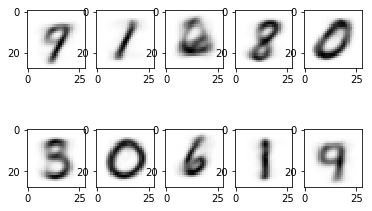

In [14]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    display_digit(clusters[i])

In [15]:
cluster_labels = [9, 1, 6, 8, 0, 3, 0, 6, 1, 9]

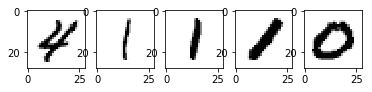

In [16]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    display_digit(test_digits[i])

In [17]:
predict = k_means_estimator.predict(input_fn=lambda: input_fn(test_digits), as_iterable=False)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmpJT0JwM/model.ckpt-1000


In [18]:
predict

{'all_scores': array([[  59.77552795,   69.84274292,   65.12489319,   60.52429962,
           69.96234131,   81.03385925,  107.83562469,   52.71893311,
           75.89560699,   70.53191376],
        [  44.84814453,   25.24062157,   63.18087006,   53.3692627 ,
           75.16317749,   49.94404602,   83.78926849,   39.71927643,
           15.50570107,   48.34386826],
        [  44.70080566,   26.3229599 ,   63.95630646,   49.86247253,
           81.36401367,   56.1917572 ,   99.3399353 ,   44.01984406,
           17.33502197,   58.32485962],
        [  66.66483307,   39.65876007,   73.87456512,   44.4420929 ,
           87.51142883,   82.20851135,  118.8301239 ,   70.21724701,
           79.63935852,   80.88534546],
        [ 107.50905609,  135.83435059,   97.7885437 ,  100.35538483,
           52.30142212,   96.1198349 ,   38.01309967,  112.49739075,
          131.04840088,  108.47306061]], dtype=float32),
 'cluster_idx': array([7, 8, 8, 1, 6])}

In [19]:
print([cluster_labels[i] for i in predict['cluster_idx']])

[6, 1, 1, 1, 0]


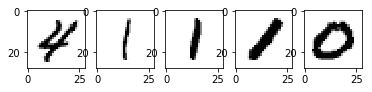

In [20]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    display_digit(test_digits[i])

In [21]:
training_labels[:5]

array([3, 6, 0, 4, 8], dtype=uint8)

In [22]:
predict_train = k_means_estimator.predict(input_fn=lambda: input_fn(test_digits), as_iterable=False)

INFO:tensorflow:Restoring parameters from /var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmpJT0JwM/model.ckpt-1000


In [23]:
def display_accuracy(cluster_labels, cluster_idx, actual_labels):

    predict_labels = [cluster_labels[i] for i in cluster_idx]
    
    num_accurate_predictions = (list(predict_labels == actual_labels)).count(True)
    
    print("Number of accurate predictions: ", num_accurate_predictions)

    pctAccuracy = float(num_accurate_predictions) / float(len(actual_labels))

    print("% accurate predictions: ", pctAccuracy)    

In [24]:
display_accuracy(cluster_labels, predict_train['cluster_idx'], test_labels)

Number of accurate predictions:  4
% accurate predictions:  0.8
